In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment

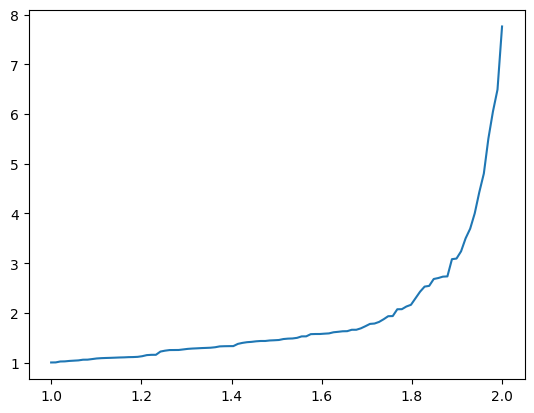

In [73]:
def val(x, tetha):
    return (1 - x) ** (1 / (1 - tetha))

N = 100
tetha = 3
a = 0.05
np.random.seed(4)
X = [val(x, tetha) for x in np.random.sample(N)]
X.sort()
x = np.linspace(1, 2, 100)
plt.plot(x, X)
plt.show()



In [74]:
tetha_estimate = N/np.sum(np.log(X)) + 1
print("ОМП: tetha_estimate = ", tetha_estimate)

right_border = (1.96 * np.log(2) * (2 ** (1 / (tetha_estimate - 1)))) / (tetha_estimate - 1) / 10 + 2 ** (1 / (tetha_estimate -1))
left_border = (-(1.96 * np.log(2) * (2 ** (1 / (tetha_estimate - 1)))) / (tetha_estimate - 1) / 10 + 2 ** (1 / (tetha_estimate -1)))

print('Доверительный интервал для медианы: [',left_border , ', ',right_border, ']')
print("Размах = ", right_border - left_border)

ОМП: tetha_estimate =  2.9784194435005427
Доверительный интервал для медианы: [ 1.322088998686132 ,  1.5170509974907231 ]
Размах =  0.1949619988045912


In [75]:
left_border1 = -1.96 * (tetha_estimate - 1) / np.sqrt(N) + tetha_estimate
right_border1 = 1.96 * (tetha_estimate - 1) / np.sqrt(N) + tetha_estimate

print('Асимптотический доверительный интервал для tetha: [',left_border1 , ', ',right_border1, ']')
print("Размах = ", right_border1 - left_border1)

Асимптотический доверительный интервал для tetha: [ 2.590649232574436 ,  3.366189654426649 ]
Размах =  0.7755404218522131


In [76]:
def f(X, N):
    return 1 + N / sum([np.log(x) for x in X])

M = np.sort(np.array([f([val(x, tetha)
                                   for x in np.random.sample(N)], N) for i in range(50000)]))

left_border2 = M[int(a/2*50000)]
right_border2 = M[int((1-a/2)*50000)]

print('Бутстраповский параметрический интервал: [',left_border2 , ', ',right_border2, ']')
print("Размах = ", right_border2 - left_border2)

Бутстраповский параметрический интервал: [ 2.657850372931186 ,  3.4514793508046386 ]
Размах =  0.7936289778734524


In [77]:
M = np.array([])
for i in range(1000):
    M = np.append(M, N/np.sum(np.log((np.random.choice(X, size = len(X))))) + 1 - tetha_estimate)
M = np.sort(M)

left_border3 = tetha_estimate + M[74]
right_border3 = tetha_estimate + M[974]

print('Бутстраповский непараметрический интервал: [',left_border3 , ', ',right_border3, ']')
print("Размах = ", right_border3 - left_border3)

Бутстраповский непараметрический интервал: [ 2.7540910962210448 ,  3.3768443816084597 ]
Размах =  0.6227532853874149


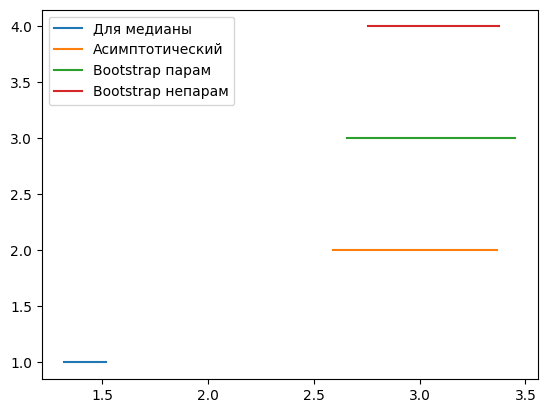

In [78]:
x1 = np.linspace(left_border, right_border, 100)
y1 = [1] * 100

x2 = np.linspace(left_border1, right_border1, 100)
y2 = [2] * 100

x3 = np.linspace(left_border2, right_border2, 100)
y3 = [3] * 100

x4 = np.linspace(left_border3, right_border3, 100)
y4 = [4] * 100

plt.plot(x1, y1,)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.legend(['Для медианы', 'Асимптотический', 'Bootstrap парам', 'Bootstrap непарам'])

plt.show()